## About Dataset :

- Property Name: Describes the type of property (1 BHK , 2 BHK etc.)
- Project Name: Identifies the name of the development project.
- Location: Specifies the neighborhood or area within Mumbai and Pune.
- City: Indicates the city ( Mumbai , Pune )
- Price: Lists the selling price of the property.
- Area (sqft): Provides the total area of the apartment in square feet.
- Construction Status: Under Construction and Ready to move
- Possession Date: Indicates how many year old is the property.
- Bathrooms: States the number of bathrooms in the apartment.
- Developer: Names the company or individual responsible for developing the property.

## 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import re
import json
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("properties.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72093 entries, 0 to 72092
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Property Name        72093 non-null  object
 1   Project Name         72093 non-null  object
 2   Location             72093 non-null  object
 3   City                 72093 non-null  object
 4   Price                72093 non-null  object
 5   Area (sqft)          72093 non-null  int64 
 6   Construction Status  72093 non-null  object
 7   bathrooms            72093 non-null  object
 8   Developer            72093 non-null  object
dtypes: int64(1), object(8)
memory usage: 5.0+ MB


In [4]:
df.head(20)

,Property Name,Project Name,Location,City,Price,Area (sqft),Construction Status,bathrooms,Developer
0,1 BHK Apartment,9 PBR 9 PBR,"Byculla, Mumbai",Mumbai,1.65 Cr,627,Under Construction,1 Bathrooms,1 BHK Property for Sale in Byculla Mumbai:
1,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,88 L,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:
2,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,95 L,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:
3,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,97 L,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:
4,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,99 L,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:
5,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,14 L,276,Under Construction,Not Available,1 BHK Property for Sale in Karjat Mumbai:
6,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,14 L,276,Under Construction,Not Available,1 BHK Property for Sale in Karjat Mumbai:
7,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,14 L,276,Under Construction,Not Available,1 BHK Property for Sale in Karjat Mumbai:
8,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,14 L,276,Under Construction,Not Available,1 BHK Property for Sale in Karjat Mumbai:
9,1 BHK Apartment,9 PBR 9 PBR,"Rasayani, Mumbai",Mumbai,27.56 L,313,Under Construction,Not Available,1 BHK Property for Sale in Rasayani Mumbai:


In [5]:
df.tail()

,Property Name,Project Name,Location,City,Price,Area (sqft),Construction Status,bathrooms,Developer
72088,9 BHK Apartment,Swaraj Homes Prabhu Niwas,"Juhu, Mumbai",Mumbai,38 Cr,7500,Ready to move,2 Bathrooms,9 BHK Property for Sale in Juhu Mumbai:
72089,9 BHK Apartment,Swaraj Homes Prabhu Niwas,"Kandivali West, Mumbai",Mumbai,34 Cr,7000,Ready to move,2 Bathrooms,9 BHK Property for Sale in Kandivali West Mumbai:
72090,9 BHK Apartment,Transcon Triumph,"Juhu, Mumbai",Mumbai,30 Cr,6350,Ready to move,6 Bathrooms,9 BHK Property for Sale in Juhu Mumbai:
72091,9 BHK Villa,Radhey Galaxy,"Kharghar, Mumbai",Mumbai,20 Cr,13500,Ready to move,2 Bathrooms,9 BHK Property for Sale in Kharghar Mumbai:
72092,9 BHK Villa,Siddhi Highland Springs,"Kharghar, Mumbai",Mumbai,20 Cr,13500,Ready to move,2 Bathrooms,9 BHK Property for Sale in Kharghar Mumbai:


In [6]:
df.bathrooms.unique()

array(['1 Bathrooms', 'Not Available', '4 Bathrooms', '2 Bathrooms',
       '9 Bathrooms', '3 Bathrooms', '5 Bathrooms', '6 Bathrooms',
       '8 Bathrooms', '7 Bathrooms'], dtype=object)

In [7]:
df.replace('Not Available', np.nan, inplace=True)

In [8]:
df.isna().sum()

Property Name             0
Project Name              0
Location                  0
City                      0
Price                     0
Area (sqft)               0
Construction Status       0
bathrooms              9660
Developer              1981
dtype: int64

In [9]:
# Function to extract BHK value from the 'Property Name'
def extract_bhk(property_name):
    match = re.search(r'(\d+)\s*BHK', property_name)  # Look for digits followed by 'BHK'
    if match:
        return int(match.group(1))  # Return the first matched group as an integer
    return None  # Return None if no match is found

# Apply the function to create a new 'BHK' column
df['BHK'] = df['Property Name'].apply(extract_bhk)

In [10]:
# Handle 'Price' column (e.g., convert '66 L' to 66 Lakhs)
def convert_price_to_lakhs(price_str):
    if 'L' in price_str:
        # Remove 'L' and convert to rupees by multiplying by 1,00,000
        return float(price_str.replace(' L', '').replace(',', '')) * 1_00_000
    elif 'Cr' in price_str:
        # Remove 'Cr' and convert to rupees by multiplying by 1 Crore (1 Cr = 1 Crore = 10,000,000)
        return float(price_str.replace(' Cr', '').replace(',', '')) * 1_00_00_000
    else:
        # If no 'L' or 'Cr', return as is (assuming it's already in rupees)
        return float(price_str.replace(',', ''))  # Remove commas if any

df['Price'] = df['Price'].apply(convert_price_to_lakhs)


In [11]:
df.head(20)

,Property Name,Project Name,Location,City,Price,Area (sqft),Construction Status,bathrooms,Developer,BHK
0,1 BHK Apartment,9 PBR 9 PBR,"Byculla, Mumbai",Mumbai,16500000.0,627,Under Construction,1 Bathrooms,1 BHK Property for Sale in Byculla Mumbai:,1.0
1,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,8800000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0
2,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,9500000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0
3,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,9700000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0
4,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,9900000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0
5,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,1400000.0,276,Under Construction,NaN,1 BHK Property for Sale in Karjat Mumbai:,1.0
6,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,1400000.0,276,Under Construction,NaN,1 BHK Property for Sale in Karjat Mumbai:,1.0
7,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,1400000.0,276,Under Construction,NaN,1 BHK Property for Sale in Karjat Mumbai:,1.0
8,1 BHK Apartment,9 PBR 9 PBR,"Karjat, Mumbai",Mumbai,1400000.0,276,Under Construction,NaN,1 BHK Property for Sale in Karjat Mumbai:,1.0
9,1 BHK Apartment,9 PBR 9 PBR,"Rasayani, Mumbai",Mumbai,2756000.0,313,Under Construction,NaN,1 BHK Property for Sale in Rasayani Mumbai:,1.0


In [12]:
# Handle 'Area (sqft)' - Make sure it's numeric (assuming it's already in numeric format)
df['Area (sqft)'] = pd.to_numeric(df['Area (sqft)'], errors='coerce')

In [13]:
# Convert 'Bathrooms' to numeric
df['Bathrooms'] = df['bathrooms'].str.extract('(\d+)').astype(float)

In [14]:
df.head()

,Property Name,Project Name,Location,City,Price,Area (sqft),Construction Status,bathrooms,Developer,BHK,Bathrooms
0,1 BHK Apartment,9 PBR 9 PBR,"Byculla, Mumbai",Mumbai,16500000.0,627,Under Construction,1 Bathrooms,1 BHK Property for Sale in Byculla Mumbai:,1.0,1.0
1,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,8800000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0,1.0
2,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,9500000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0,1.0
3,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,9700000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0,1.0
4,1 BHK Apartment,9 PBR 9 PBR,"Kandivali East, Mumbai",Mumbai,9900000.0,700,Under Construction,1 Bathrooms,1 BHK Property for Sale in Kandivali East Mumbai:,1.0,1.0


In [15]:
df['Construction Status'].value_counts()

Construction Status
Ready to move         58356
Under Construction    13737
Name: count, dtype: int64

In [16]:
# Convert 'Construction Status' to numeric categories (e.g., ready/under construction)
df['Construction Status'] = df['Construction Status'].replace({'Under Construction': 0, 'Ready to move': 1})

In [17]:
df['Location'].value_counts()

Location
Kharadi, Pune                3399
Hinjewadi, Pune              3036
Wakad, Pune                  2967
Thane West, Mumbai           2858
Tathawade, Pune              2643
                             ... 
Taljai Temple Road, Pune        1
Balewadi Road, Pune             1
Perugate, Pune                  1
Shahpur, Mumbai                 1
Mumbai Pune Highway, Pune       1
Name: count, Length: 496, dtype: int64

In [18]:
# Encode categorical columns ( City, Developer)
label_encoder = LabelEncoder()
categorical_cols = [ 'City', 'Developer']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [19]:
# Initialize the LabelEncoder and fit_transform on the cleaned location
label_encoder = LabelEncoder()
label_encoder.fit(df['Location'])
with open('Location.pkl', 'wb') as file:
    pickle.dump(label_encoder,file)

df['Location_encoded'] = label_encoder.fit_transform(df['Location'])

# Create a dictionary to map cleaned locations to encoded values
location_mapping = {location: int(code) for location, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

# Save the cleaned location mapping to a JSON file
with open('location_mapping.json', 'w') as json_file:
    json.dump(location_mapping, json_file, indent=4)

In [20]:
# Drop unnecessary columns (e.g., 'Property Name', 'Project Name')
df.drop(['Property Name', 'Project Name', 'bathrooms','Developer'], axis=1, inplace=True)

In [21]:
df.head(10)

,Location,City,Price,Area (sqft),Construction Status,BHK,Bathrooms,Location_encoded
0,"Byculla, Mumbai",0,16500000.0,627,0,1.0,1.0,71
1,"Kandivali East, Mumbai",0,8800000.0,700,0,1.0,1.0,176
2,"Kandivali East, Mumbai",0,9500000.0,700,0,1.0,1.0,176
3,"Kandivali East, Mumbai",0,9700000.0,700,0,1.0,1.0,176
4,"Kandivali East, Mumbai",0,9900000.0,700,0,1.0,1.0,176
5,"Karjat, Mumbai",0,1400000.0,276,0,1.0,NaN,182
6,"Karjat, Mumbai",0,1400000.0,276,0,1.0,NaN,182
7,"Karjat, Mumbai",0,1400000.0,276,0,1.0,NaN,182
8,"Karjat, Mumbai",0,1400000.0,276,0,1.0,NaN,182
9,"Rasayani, Mumbai",0,2756000.0,313,0,1.0,NaN,353


In [22]:
df['BHK'] = df['BHK'].fillna(df['BHK'].mode()[0])
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mode()[0])

In [23]:
# Update the 'Bathrooms' column based on the 'BHK' column
df.loc[df['Bathrooms'] < df['BHK'], 'Bathrooms'] = df['BHK']

In [24]:
df.isna().sum()

Location               0
City                   0
Price                  0
Area (sqft)            0
Construction Status    0
BHK                    0
Bathrooms              0
Location_encoded       0
dtype: int64

In [25]:
df.drop('Location' , axis=1 ,inplace=True)

In [26]:
df.to_csv('data_with_location_encoded.csv',index=False)

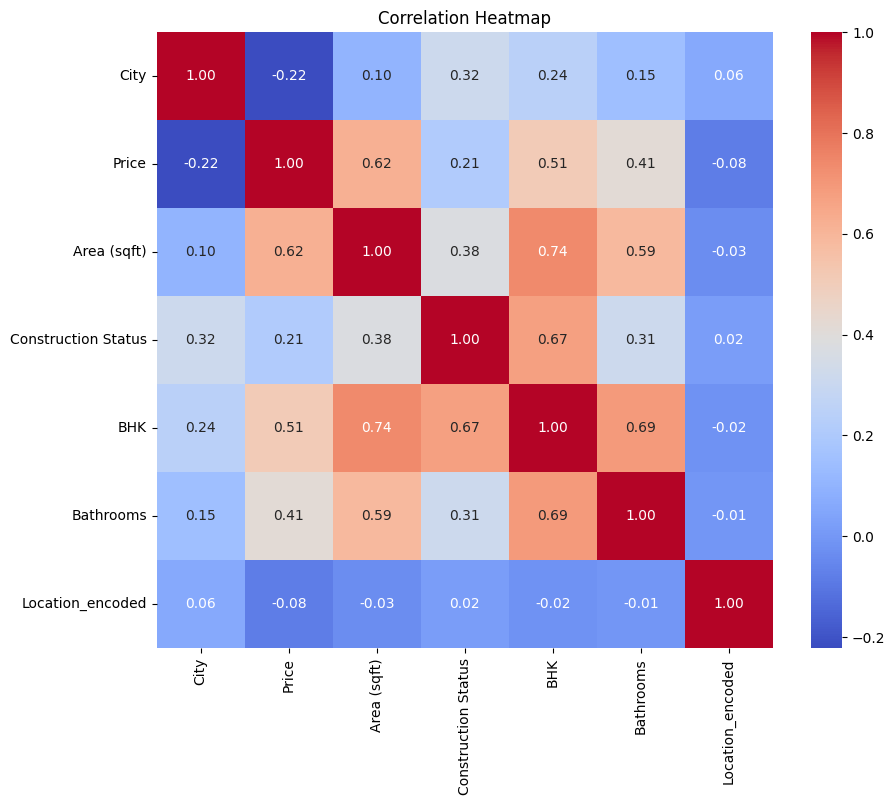

In [27]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

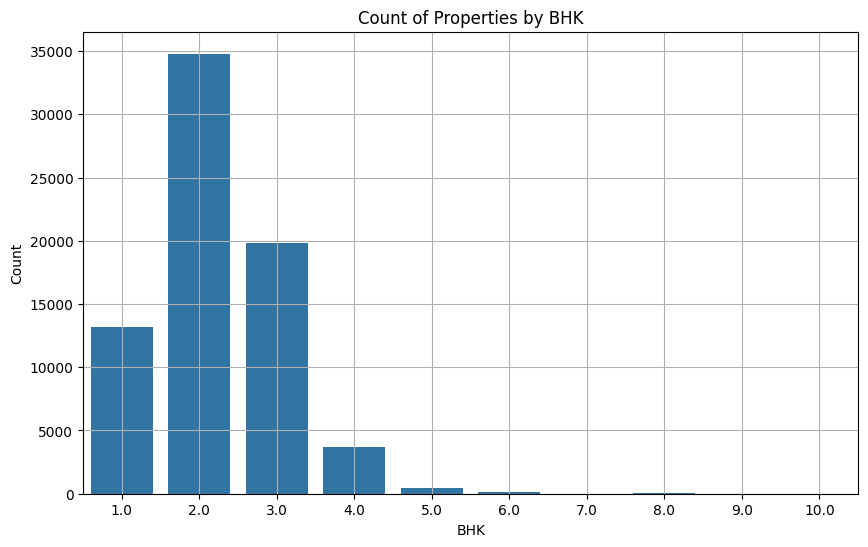

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BHK', data=df)
plt.title('Count of Properties by BHK')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.grid()
plt.show()

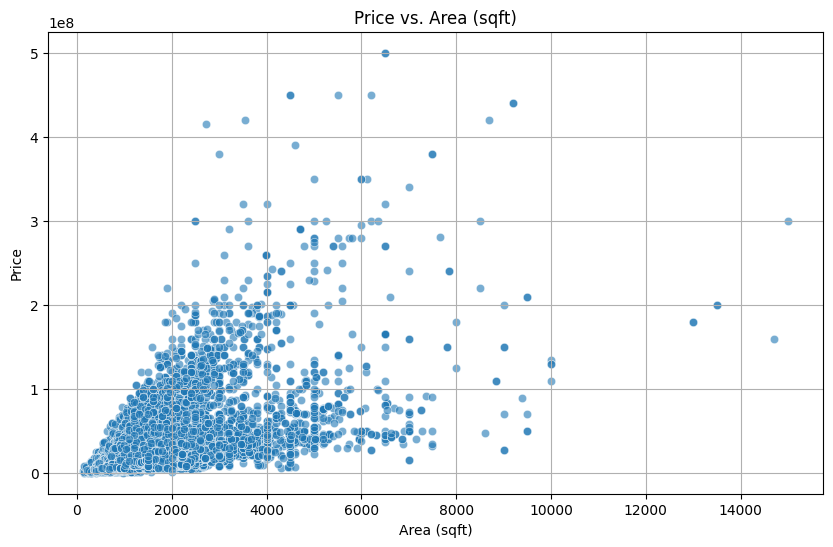

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area (sqft)', y='Price', data=df, alpha=0.6)
plt.title('Price vs. Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.grid()
plt.show()

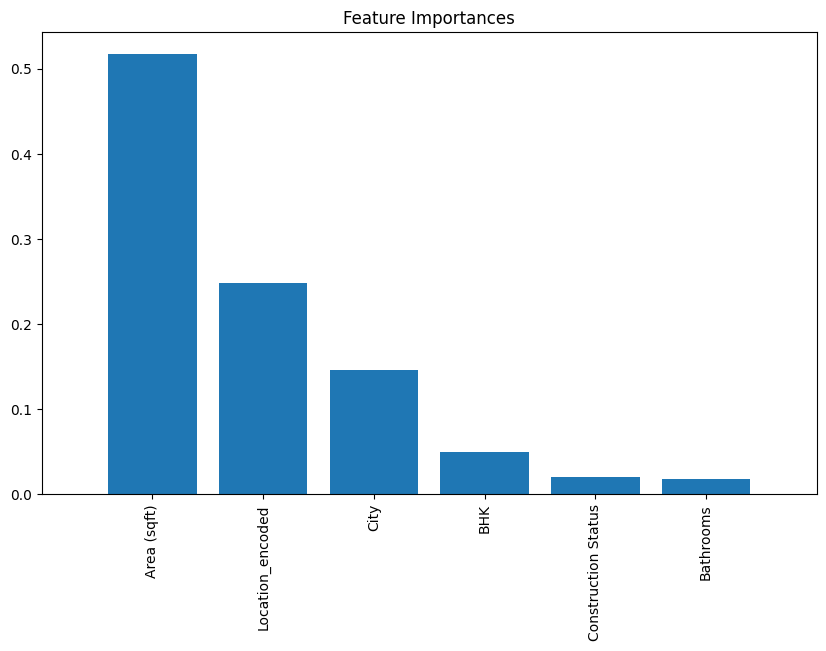

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Assuming the model is already trained
model = RandomForestRegressor(n_estimators=100)
model.fit(df.drop('Price',axis=1), df['Price'])
X = df.drop('Price',axis=1)
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [31]:
df['City'].value_counts()        # 1 for pune and 0 for mumbai

City
1    42113
0    29980
Name: count, dtype: int64

In [32]:
df['Construction Status'].value_counts()

Construction Status
1    58356
0    13737
Name: count, dtype: int64

In [33]:
df.isna().sum()

City                   0
Price                  0
Area (sqft)            0
Construction Status    0
BHK                    0
Bathrooms              0
Location_encoded       0
dtype: int64

In [34]:
df['BHK'].mode()[0]

2.0

In [35]:
df.head()

,City,Price,Area (sqft),Construction Status,BHK,Bathrooms,Location_encoded
0,0,16500000.0,627,0,1.0,1.0,71
1,0,8800000.0,700,0,1.0,1.0,176
2,0,9500000.0,700,0,1.0,1.0,176
3,0,9700000.0,700,0,1.0,1.0,176
4,0,9900000.0,700,0,1.0,1.0,176


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72093 entries, 0 to 72092
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 72093 non-null  int32  
 1   Price                72093 non-null  float64
 2   Area (sqft)          72093 non-null  int64  
 3   Construction Status  72093 non-null  int64  
 4   BHK                  72093 non-null  float64
 5   Bathrooms            72093 non-null  float64
 6   Location_encoded     72093 non-null  int32  
dtypes: float64(3), int32(2), int64(2)
memory usage: 3.3 MB


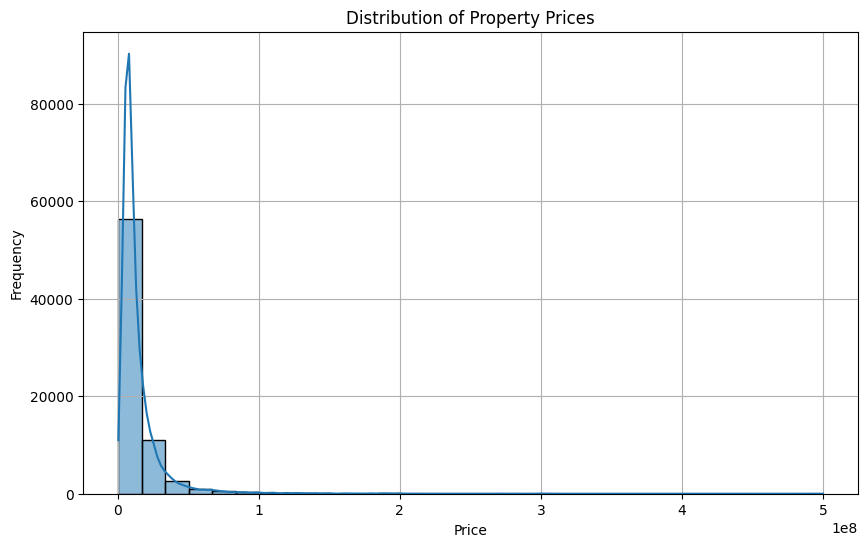

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [38]:
df.head()

,City,Price,Area (sqft),Construction Status,BHK,Bathrooms,Location_encoded
0,0,16500000.0,627,0,1.0,1.0,71
1,0,8800000.0,700,0,1.0,1.0,176
2,0,9500000.0,700,0,1.0,1.0,176
3,0,9700000.0,700,0,1.0,1.0,176
4,0,9900000.0,700,0,1.0,1.0,176


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72093 entries, 0 to 72092
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 72093 non-null  int32  
 1   Price                72093 non-null  float64
 2   Area (sqft)          72093 non-null  int64  
 3   Construction Status  72093 non-null  int64  
 4   BHK                  72093 non-null  float64
 5   Bathrooms            72093 non-null  float64
 6   Location_encoded     72093 non-null  int32  
dtypes: float64(3), int32(2), int64(2)
memory usage: 3.3 MB


In [40]:
df.to_csv("preprocessed_data.csv" , index=False )

In [41]:
df.tail()

,City,Price,Area (sqft),Construction Status,BHK,Bathrooms,Location_encoded
72088,0,380000000.0,7500,1,9.0,9.0,162
72089,0,340000000.0,7000,1,9.0,9.0,177
72090,0,300000000.0,6350,1,9.0,9.0,162
72091,0,200000000.0,13500,1,9.0,9.0,202
72092,0,200000000.0,13500,1,9.0,9.0,202
